# Фаза 2 • Неделя 11 • Понедельник
## Рекомендательные системы
### Классические подходы

### Задание

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

Запусти ячейку ниже, чтобы загрузить данные.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ml-100k.zip to ml-100k.zip


In [6]:
import zipfile
import io

file_name = 'ml-100k.zip'

with zipfile.ZipFile(io.BytesIO(uploaded[file_name]), 'r') as zip_ref:
    zip_ref.extractall('/content')

In [7]:
# 1. Users dataset
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('/content/ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1', parse_dates=True, header=None)
# 2. Rating dataset
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('/content/ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# 3.Movies Dataset
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url','unknown',
          'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy',
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
          'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
          'Thriller', 'War', 'Western']
movies = pd.read_csv('/content/ml-100k/u.item', sep='|', names=m_cols,
                     encoding='latin-1').drop(['video_release_date', 'unknown'], axis=1)

ratings = ratings.merge(movies[['movie_id', 'title']], how='left', on='movie_id')

In [8]:
users.shape, ratings.shape, movies.shape

((943, 5), (100000, 5), (1682, 22))

In [9]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [22]:
movies.head()

,movie_id,title,release_date,imdb_url,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [23]:
movies.columns.to_list()

['movie_id',
 'title',
 'release_date',
 'imdb_url',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [12]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [29]:
ratings.columns.to_list()

['user_id', 'movie_id', 'rating', 'unix_timestamp', 'title']

## 📊 Exploratory data analysis / Разведывательный анализ данных

Чтобы что-то рекомендовать, всегда стоит узнать о пользователях побольше. В этом разделе тебе необходимо визуализировать распределения разных признаков твоей рекомендательной системы.

### Пользователь 👨

Визуализируй следующие распределения:
- пола (`barplot`)

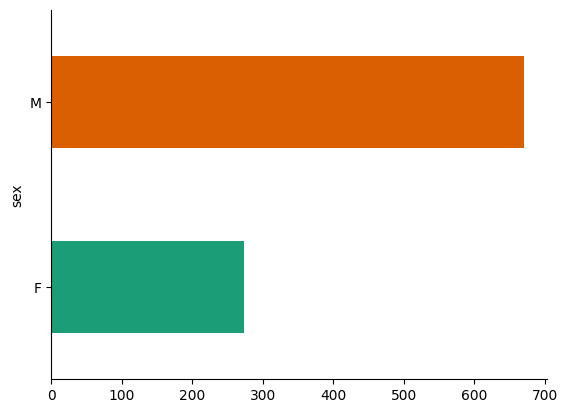

In [16]:
users.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

- возраста (`hist`)

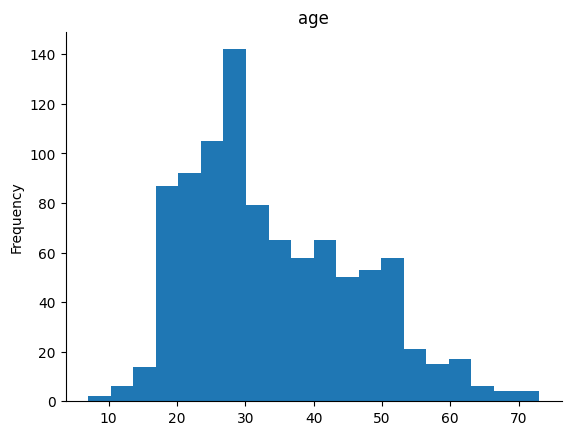

In [18]:
users['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

- профессии (`barplot`)

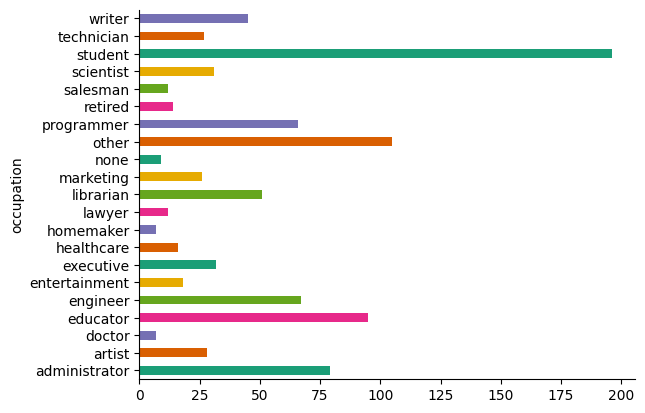

In [19]:
users.groupby('occupation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Фильмы 🎥

Визуализируй следующие распределения:

- количество фильмов каждого жанра (у нас есть много жанров фильмов: сколько фильмов у каждого жанра?)

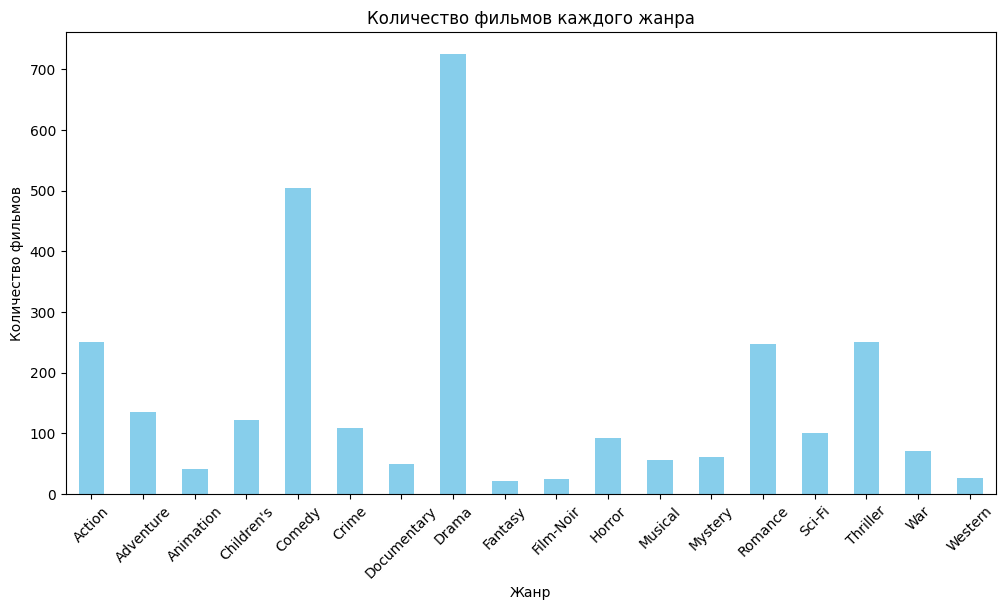

In [25]:
# Подсчитываем количество фильмов каждого жанра
genre_counts = movies.iloc[:, 4:].sum()

# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Количество фильмов каждого жанра')
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()


- распределение количества жанров у разных фильмов (какие-то фильмы принадлежат одному жанру, какие-то сразу нескольким)

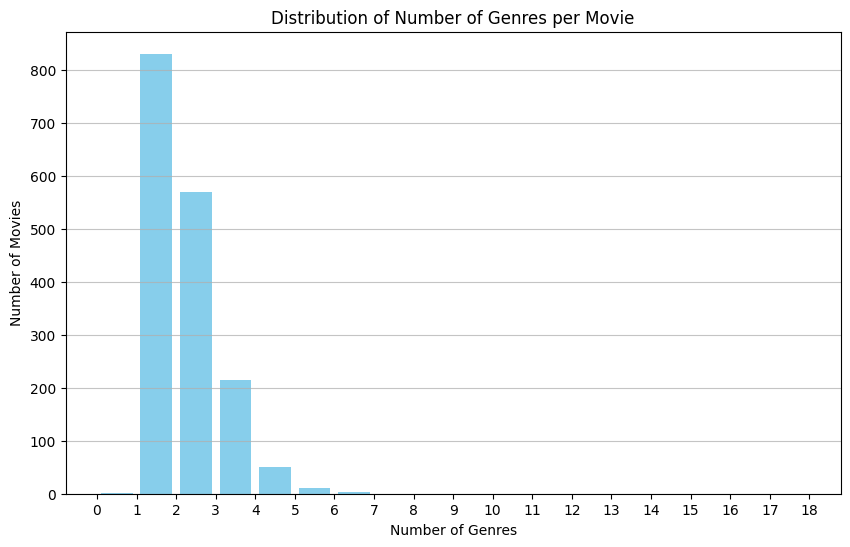

In [26]:
# Создание новой колонки с суммой жанров для каждого фильма
movies['genre_count'] = movies[['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum(axis=1)

plt.figure(figsize=(10, 6))
plt.hist(movies['genre_count'], bins=range(0, 19), rwidth=0.8, color='skyblue')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Movies')
plt.title('Distribution of Number of Genres per Movie')
plt.xticks(range(0, 19))
plt.grid(axis='y', alpha=0.75)
plt.show()

- корреляцонная матрица жанров (какие-то жанры близки между собой, а какие-то противоречивы, корреляционная матрица поможет понять, какие жанры связаны между собой больше всего)

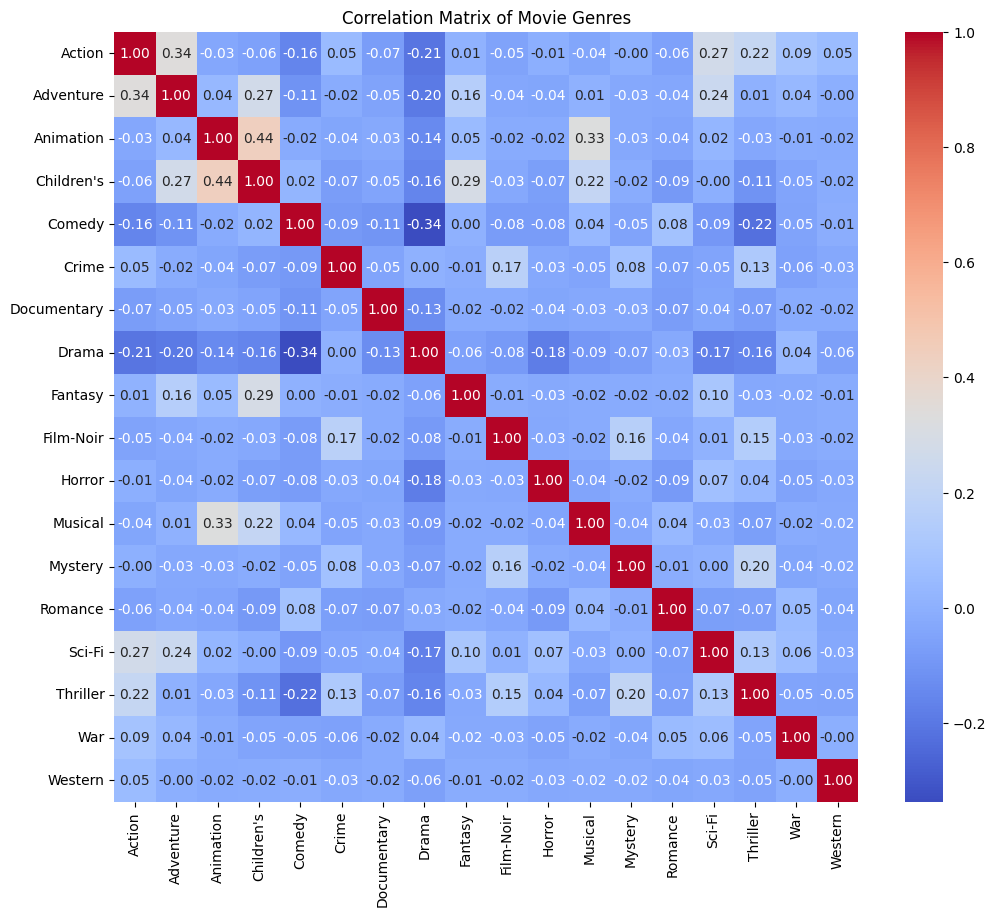

In [27]:
genre_cols = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

genre_corr = movies[genre_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(genre_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Movie Genres')
plt.show()

# ❓

Найди два жанра, которые больше всего близки друг к другу и запиши ответ в ячейку ниже

Children's и Animation

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. После пуша распечатай результат команды `!git status` в ячейке ниже.

In [ ]:
# code

### Анализ рейтинга 🔢
Рейтинг - самое информативное, что у тебя есть.

1. Построй распределение количества оценок, поставленных пользователем. Это должна быть функция, которая принимает на вход `user_id`, а на выходе возвращает словарь вида:
    
`{1: <число оценок 1, 2: <число оценок 2>, ..., 5 <число оценок 5>}`

На основе этой результата данной функции должен строиться словарь.

In [30]:
def get_user_ratings(user_id: int) -> dict:
    user_ratings = ratings[ratings['user_id'] == user_id]['rating'].value_counts().to_dict()
    return user_ratings

In [32]:
user_id = 1
user_ratings = get_user_ratings(user_id)
user_ratings

{4: 82, 5: 81, 3: 56, 2: 28, 1: 25}

2. Построй распределение средней оценки по пользователям. Для этого нужно узнать, какая средняя оценка у каждого пользователя, а после этого построить распределение.

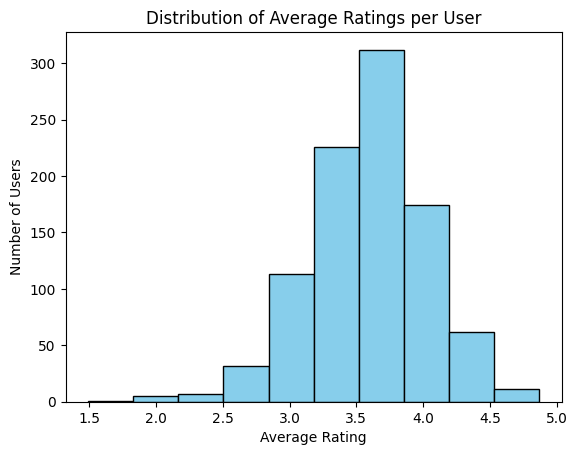

In [33]:
average_ratings = ratings.groupby('user_id')['rating'].mean()

# Построение распределения
plt.hist(average_ratings, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.title('Distribution of Average Ratings per User')
plt.show()

3. Построй распределение количества оценок, поставленных фильму. Каждый фильм оценен разное количество раз. Узнай, сколько оценок у каждого фильма, а после визуализируй это на гистограмме.  

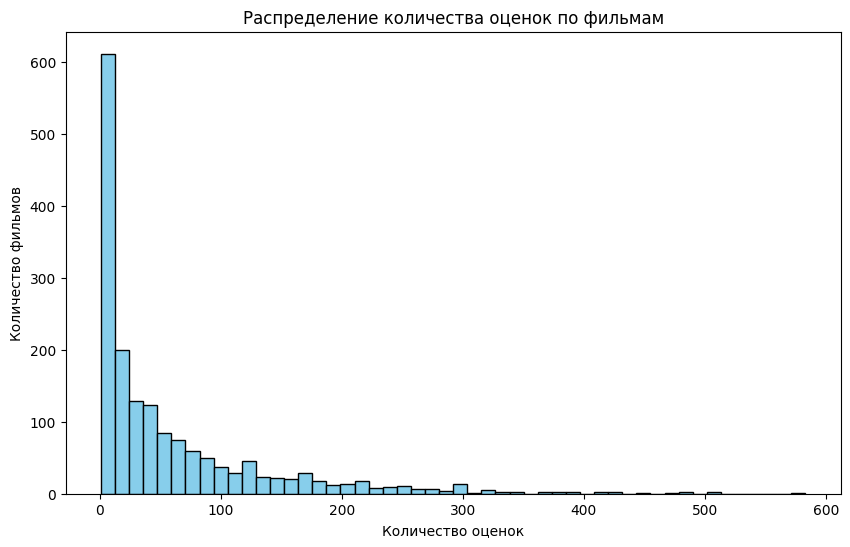

In [35]:
ratings_per_movie = ratings['movie_id'].value_counts()

plt.figure(figsize=(10,6))
plt.hist(ratings_per_movie, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Количество оценок')
plt.ylabel('Количество фильмов')
plt.title('Распределение количества оценок по фильмам')
plt.show()

4. Построй распределение средней оценки по фильмам.

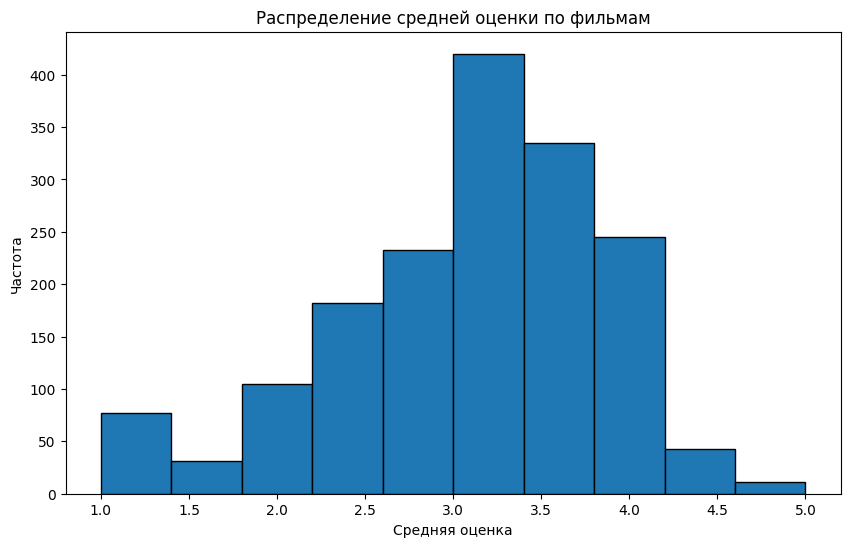

In [36]:
average_ratings = ratings.groupby('movie_id')['rating'].mean()

average_ratings.plot(kind='hist', bins=10, edgecolor='black', figsize=(10, 6))
plt.title('Распределение средней оценки по фильмам')
plt.xlabel('Средняя оценка')
plt.ylabel('Частота')
plt.show()

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. После пуша распечатай результат команды `!git status` в ячейке ниже.

In [ ]:
# code

### Рекомендации по популярности 🔝

Мы хотим рекомендовать фильмы с самой большой оценкой, которые при этом смотрели достаточно часто. Для этого нужно оценить величину, которую мы назовем __score__, значение которой будет вычисляться как логарифм числа оценок фильма, умноженный на среднюю оценку:
$$score_{film} = \log n * \bar{r}_{film},$$
где $n$ - число оценок для фильма, $\bar{r}_{film}$ - средний рейтинг фильма.

# ❓
Зачем мы берем логарифм от числа оценок фильма?

> ответ тут

Добавь колонки `num_ratings, mean_rating, score` в датафрейм `ratings` и найди топ-10 фильмов, которые всем точно стоит посмотреть.

In [44]:
# Расчет количества оценок и средней оценки для каждого фильма
ratings['num_ratings'] = ratings.groupby('movie_id')['rating'].transform('count')
ratings['mean_rating'] = ratings.groupby('movie_id')['rating'].transform('mean')

# Расчет score для каждого фильма
ratings['score'] = np.log(ratings['num_ratings']) * ratings['mean_rating']

# Нахождение топ-10 фильмов
top_movies = ratings.groupby('movie_id')['score'].mean().sort_values(ascending=False).head(10)

ratings_sorted = ratings.sort_values(by='score', ascending=False).drop_duplicates(subset='movie_id')
ratings_sorted[['movie_id', 'num_ratings', 'mean_rating', 'score', 'title']].head(10)

,movie_id,num_ratings,mean_rating,score,title
65896,50,583,4.358491,27.755684,Star Wars (1977)
77498,100,508,4.155512,25.890839,Fargo (1996)
20874,127,413,4.283293,25.800191,"Godfather, The (1972)"
76784,174,420,4.252381,25.685464,Raiders of the Lost Ark (1981)
29673,98,390,4.289744,25.593240,"Silence of the Lambs, The (1991)"
21633,318,298,4.466443,25.445743,Schindler's List (1993)
77648,64,283,4.445230,25.095308,"Shawshank Redemption, The (1994)"
87249,181,507,4.007890,24.963184,Return of the Jedi (1983)
62136,313,350,4.245714,24.871110,Titanic (1997)
6271,172,367,4.204360,24.828265,"Empire Strikes Back, The (1980)"


## Контентный подход

### Похожесть фильмов между собой 🎥 - 🎥

Посчитай меры похожести каждой пары фильмов по жанрам. Будем рекомендовать фильмы, похожие на какой-нибудь из фильмов, который понравился пользователю. В результате должна получиться функция `recommend(user_id, top=10)`, которая должна выдавать `list` или `pd.DataFrame` из `<top>` фильмов, которые мы будем рекомендовать пользователю.

In [ ]:
def recommend(user_id, top=10):
    pass
    return top_films

In [46]:
genre_cols = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy',
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
          'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
          'Thriller', 'War', 'Western']

# создание таблицы жанров
genre_matrix = movies[genre_cols]
genre_matrix = genre_matrix.set_index(movies['movie_id']) # установка movie_id в качестве индекса

# создание функции для расчета сходства по жанрам
def jaccard_similarity(movie_id1, movie_id2):
    genres_movie1 = set(genre_matrix.loc[movie_id1])
    genres_movie2 = set(genre_matrix.loc[movie_id2])

    intersection = len(genres_movie1.intersection(genres_movie2))
    union = len(genres_movie1.union(genres_movie2))

    return intersection / union

# функция рекомендации фильмов
def recommend(user_id, top=10):
    user_rated_movies = ratings[ratings['user_id'] == user_id]['movie_id']
    similar_movies = []

    for movie_id in user_rated_movies:
        similar_movies.extend([(movie_id2, jaccard_similarity(movie_id, movie_id2)) for movie_id2 in genre_matrix.index if movie_id != movie_id2])

    similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[:top]
    recommended_movies = [item[0] for item in similar_movies]

    return movies[movies['movie_id'].isin(recommended_movies)]

# пример вызова функции рекомендации для пользователя с id=1 и top=10
recommend(36, 10)

,movie_id,title,release_date,imdb_url,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_count
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,7,Twelve Monkeys (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
7,8,Babe (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,3
8,9,Dead Man Walking (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,10,Richard III (1995),22-Jan-1996,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2


### Похожесть пользователей между собой 🥸 - 🥴

Найди 10 самых похожих пользователей и рекомендуй текущему пользователю то, что понравилось наиболее близким к нему пользователям. В результате должна получиться функция `recommend_by_user(user_id, top=10)`, которая должна выдавать `list` или `pd.DataFrame` из `<top>` фильмов, которые мы будем рекомендовать пользователю.

In [ ]:
def recommend_by_user(user_id, top=10):
    pass
    return top_films

In [47]:
def recommend_by_user(user_id, top=10):
    # Получаем показанные фильмы текущему пользователю
    shown_movies = ratings[ratings['user_id'] == user_id]['movie_id'].tolist()

    # Строим матрицу пользовательских оценок
    user_movie_matrix = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)

    # Находим сходство пользователей с текущим пользователем
    similarities = user_movie_matrix.corrwith(user_movie_matrix.loc[user_id])
    similar_users = similarities.sort_values(ascending=False)[1:top+1]

    # Находим фильмы, которые понравились близким пользователям и которые не показывались текущему пользователю
    recommended_movies = []
    for user in similar_users.index:
        movies_rated = ratings[ratings['user_id'] == user]
        recommended_movies.extend(movies_rated[movies_rated['rating'] >= 4]['movie_id'].tolist())

    recommended_movies = list(set(recommended_movies) - set(shown_movies))[:top]

    # Получаем информацию о рекомендуемых фильмах
    recommendations = movies[movies['movie_id'].isin(recommended_movies)][['title', 'release_date']]

    return recommendations

In [48]:
recommendations = recommend_by_user(user_id=10, top=10)
recommendations

,title,release_date
1,GoldenEye (1995),01-Jan-1995
7,Babe (1995),01-Jan-1995
13,"Postino, Il (1994)",01-Jan-1994
19,Angels and Insects (1995),01-Jan-1995
20,Muppet Treasure Island (1996),16-Feb-1996
513,Annie Hall (1977),01-Jan-1977
514,"Boot, Das (1981)",04-Apr-1997
516,Manhattan (1979),01-Jan-1979
1034,Cool Runnings (1993),01-Jan-1993
1040,Forget Paris (1995),01-Jan-1995


### Slope One

Реализуй подход Slope One (пример есть в слайдах лекции или в [статье](https://www.researchgate.net/publication/1960789_Slope_One_Predictors_for_Online_Rating-Based_Collaborative_Filtering))

In [49]:
# Объединение данных по movie_id
movie_ratings = pd.merge(ratings, movies, on='movie_id')

# Создание таблицы разностей и средних значений
diff_table = pd.pivot_table(movie_ratings, index='movie_id', columns='user_id', values='rating')

# Расчет средних значений
avg_ratings = movie_ratings.groupby('movie_id')['rating'].mean()

In [50]:
def slope_one_predict(user_id, movie_id):
    # Фильтрация данных
    user_ratings = diff_table[user_id]
    movie_ratings = diff_table[movie_id]

    # Расчет разностей и средних значений
    diff = diff_table.sub(user_ratings, axis=0)
    pred = avg_ratings + diff.mean()

    # Предсказание рейтинга
    if movie_id in user_ratings.index:
        return user_ratings[movie_id]
    elif movie_id in pred.index:
        return pred[movie_id]
    else:
        return 0

In [52]:
user_id = 2
movie_id = 1
predicted_rating = slope_one_predict(user_id, movie_id)
print(f'Predicted rating for user {user_id} and movie {movie_id}: {predicted_rating}')

Predicted rating for user 2 and movie 1: 4.0


### scikit-surprice

Реализуй предсказание рейтинга пользователя с помощью алгоритма [Nonnegative Matrix Factorization](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.NMF). Для этого понадобится библиотека [scikit-surpice](https://surprise.readthedocs.io/en/stable/index.html)

In [ ]:
!pip install surprise

In [55]:
from surprise import NMF, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

# Загрузка данных в формате, подходящем для библиотеки surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

# Разделение данных на тренировочный и тестовый наборы
trainset, testset = train_test_split(data, test_size=0.2)

# Обучение модели
model = NMF()
model.fit(trainset)

# Получение предсказаний для тестового набора
predictions = model.test(testset)

# Оценка качества модели
rmse_value = rmse(predictions)
print("RMSE value: ", rmse_value)

RMSE: 0.9670
RMSE value:  0.9669867579245457


<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сделай `commit + push` на  __github__.

In [ ]:
# code